<ipython-input-1-2c10efb32af6>:5: RuntimeWarning: divide by zero encountered in log
  y = np.log(x/(1-x))   #สำหรับ numpy เมธอด log() เท่ากับ Natural Log


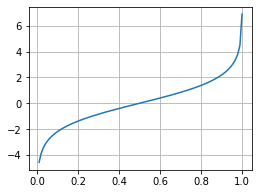

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 0.999, num=100)
y = np.log(x/(1-x))   #สำหรับ numpy เมธอด log() เท่ากับ Natural Log

plt.figure(figsize=(4, 3))
plt.plot(x, y)
plt.grid()
plt.show()


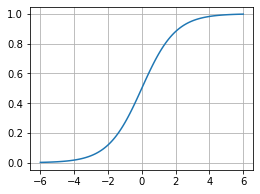

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 121)
y = 1/(1 + np.exp(-x))       #สำหรับ numpy เมธอด exp(x) เท่ากับ e**x

plt.figure(figsize=(4, 3))
plt.plot(x, y)
plt.grid()
plt.show()

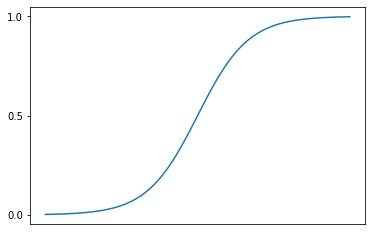

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 121)
y = 1/(1 + np.exp(-x))       

plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.yticks([0.0, 0.5, 1.0])
plt.xticks([])
plt.show()

In [1]:
#example 5-1

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

x = [[8, 6], [3, 5], [4, 9], [5, 8], [9, 9]]  #[[x1, x2], ...]
y = ['yes', 'no', 'no', 'yes', 'yes']

model.fit(x, y)

#ทำนายผลเมื่อ x1=4, x2=4, y=? และ x1=5, x2=5, y=?
x_predict = [[4, 4], [5, 5]]
y_predict = model.predict(x_predict)

print('ถ้า x = [4, 4], y =', y_predict[0])
print('ถ้า x = [5, 5], y =', y_predict[1])
print()
print('ความน่าจะเป็น')
prob = model.predict_proba(x_predict)
print(prob)

ถ้า x = [4, 4], y = no
ถ้า x = [5, 5], y = yes

ความน่าจะเป็น
[[0.69091303 0.30908697]
 [0.46549678 0.53450322]]


In [6]:
#example 5-2

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

df = pd.read_csv(r'data\hours_study.csv')
#with pd.option_context('display.max_rows', 6): display(df)

x = np.array(df['hours_study']).reshape(-1, 1)
y = df['pass']

model = LogisticRegression()
model.fit(x, y)

x_predict = [2.2, 3.3, 4.4]
x_predict = np.array(x_predict).reshape(-1, 1)
y_predict = model.predict(x_predict)

print('Prediction:')
for (i, xp) in enumerate(x_predict):
    #ถ้าผลลัพธ์เป็น 0 เปลี่ยนเป็น Fail ถ้าเป็น 1 เปลี่ยนเป็น Pass ให้สื่อความเข้าใจได้
    r = 'Fail' if y_predict[i] == 0 else 'Pass'
    print(f'Study: {xp[0]} hour(s) => {r}')

print()
print('Logistic Function:') 
ic = '{:.2f}'.format(model.intercept_[0])
ce = '{:.2f}'.format(model.coef_[0, 0])

print(f'P(x) = 1 / (1 + exp({ic} + ({ce})x))')

Prediction:
Study: 2.2 hour(s) => Fail
Study: 3.3 hour(s) => Pass
Study: 4.4 hour(s) => Pass

Logistic Function:
P(x) = 1 / (1 + exp(-3.14 + (1.15)x))


In [1]:
#example 5-3

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_excel(r'data\machine-spec.xlsx')
with pd.option_context('display.max_rows', 6): display(df)

x = df[['machine_age_months', 'operate_hours_per_day']]
y = df['machine_meets_spec']

scaler = StandardScaler()
x = scaler.fit_transform(x)

model = LogisticRegression()
model.fit(x, y)

x_predict = [[30, 6], [40, 8], [50, 5], [60, 3]]
#ข้อมูลที่จะทำนายผล ก็ต้องปรับสเกลเช่นเดียวกัน
x_predict_sc = scaler.transform(x_predict)
y_predict = model.predict(x_predict_sc)

print('Prediction:')
for (i, xp) in enumerate(x_predict):
    #คอลัมน์ผลลัพธ์มีค่าเป็น 0/1 จึงเทียบเป็นสตริงที่เข้าใจได้
    mp = 'No' if y_predict[i] == 0 else 'Yes'
    
    t = f'Machine Age: {xp[0]} Month(s), '
    t += f'Operate: {xp[1]} Hour(s)/Day '
    t += f'=> Meet Spec: {mp}'
    print(t)

print()
print('Logistic Function:') 
ic = '{:.2f}'.format(model.intercept_[0])
ce1 = '{:.2f}'.format(model.coef_[0, 0])
ce2 = '{:.2f}'.format(model.coef_[0, 1])

print(f'P(x) = 1 / (1 + exp({ic} + ({ce1})age + ({ce2})hour))')


machine_age_months  operate_hours_per_day  machine_meets_spec
0                   57                      4                   1
1                   73                      5                   0
2                   22                      5                   1
..                 ...                    ...                 ...
17                  71                      7                   0
18                  35                      4                   0
19                  44                      5                   1

[20 rows x 3 columns]

Prediction:
Machine Age: 30 Month(s), Operate: 6 Hour(s)/Day => Meet Spec: Yes
Machine Age: 40 Month(s), Operate: 8 Hour(s)/Day => Meet Spec: No
Machine Age: 50 Month(s), Operate: 5 Hour(s)/Day => Meet Spec: No
Machine Age: 60 Month(s), Operate: 3 Hour(s)/Day => Meet Spec: Yes

Logistic Function:
P(x) = 1 / (1 + exp(-0.14 + (-1.16)age + (-0.98)hour))


In [2]:
#example 5-4

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_excel(r'data\reptile.xlsx')
with pd.option_context('display.max_rows', 6): display(df)

#ข้อมูลในคอลัมน์ water เป็นสตริง ต้องเข้ารหัสเป็นตัวเลข
encoder = LabelEncoder()
df['water'] = encoder.fit_transform(df['water'])

features = ['temperature', 'water']
x = df[features]
y = df['gender']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

#ปรับสเกลให้คอลัมน์ temperature และ water มีค่าใกล้เคียงกัน 
#scaling after splitting
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)

#กำหนดข้อมูลสำหรับทำนายผล
tem = 23
water = 'Yes' 
water_enc = encoder.transform([water]) #ต้องเข้ารหัสเช่นเดียวกัน

x_pred =  [[tem, water_enc]]
x_pred_sc = scaler.transform(x_pred)  #ต้องปรับสเกลเช่นเดียวกัน
y_pred = model.predict(x_pred_sc)

print('Prediction:')
#แปลงจากตัวเลขเป็นสตริงที่เข้าใจได้ เพื่อการแสดงผล
inv_water_enc = encoder.inverse_transform(water_enc)
print(f'Temperature: {tem}, Water: {inv_water_enc[0]} => Gender: {y_pred[0]}')

print()
print('Logistic Function:')
ic = '{:.2f}'.format(model.intercept_[0])
ce1 = '{:.2f}'.format(model.coef_[0, 0])
ce2 = '{:.2f}'.format(model.coef_[0, 1])

print(f'P(x) = 1 / (1 + exp({ic} + ({ce1})tem + ({ce2})water))')

temperature water  gender
0            20    No    Male
1            22   Yes    Male
2            22   Yes  Female
..          ...   ...     ...
46           24   Yes  Female
47           22    No    Male
48           24   Yes  Female

[49 rows x 3 columns]

Prediction:
Temperature: 23, Water: Yes => Gender: Female

Logistic Function:
P(x) = 1 / (1 + exp(0.26 + (-0.75)tem + (-0.25)water))


In [4]:
#example 5-5

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score                          
from sklearn.metrics import recall_score, f1_score

df = pd.read_excel(r'data\customer.xlsx')
with pd.option_context('display.max_rows', 8): display(df)

#ข้อมูลในคอลัมน์ gender เป็นสตริง ต้องเข้ารหัสเป็นตัวเลข
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

features = ['gender', 'age', 'salary']
x = df[features]
y = df['purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

#scaling after splitting
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)

#ข้อมูลที่จะทำนายผล
gender = 'Male'
gender_enc = encoder.transform([gender])   #ต้องเข้ารหัส
age = 45
salary = 45000

x_pred = [[gender_enc, age, salary]]    
x_pred_sc = scaler.transform(x_pred)    #ต้องปรับสเกล

y_pred = model.predict(x_pred_sc)

#คอลัมน์ purchased เก็บค่า 0/1 จึงเทียบเป็นข้อความที่เข้าใจได้
print('Prediction:')
p = 'Not Purchase' if y_pred[0] == 0 else 'Purchase'
print(f'gender: {gender}, age: {age}, salary: {salary} ==>', p)
print()

### Model Evaluation ####
y_pred_test = model.predict(x_test)

print('Confusion Matrix:')
cfmx = confusion_matrix(y_test, y_pred_test)
print(cfmx)
print()

print('Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision:', '{:.2f}'.format(precision_score(y_test, y_pred_test)))
print('Recall:', '{:.2f}'.format(recall_score(y_test, y_pred_test)))
print('F1 Score:', '{:.2f}'.format(f1_score(y_test, y_pred_test)))

#error_rate = (FP + FN) / Total
err = (cfmx[0, 1] + cfmx[1, 0]) / y_test.count()
print('Error Rate', '{:.2f}'.format(err))
print()

#print(classification_report(y_test, y_predicted))

gender  age  salary  purchased
0      Male   19   19000          0
1      Male   35   20000          0
2    Female   26   43000          0
3    Female   27   57000          0
..      ...  ...     ...        ...
396    Male   51   23000          1
397  Female   50   20000          1
398    Male   36   33000          0
399  Female   49   36000          1

[400 rows x 4 columns]

Prediction:
gender: Male, age: 45, salary: 45000 ==> Not Purchase

Confusion Matrix:
[[65  3]
 [ 7 25]]

Accuracy: 0.90
Precision: 0.89
Recall: 0.78
F1 Score: 0.83
Error Rate 0.10



In [5]:
#example 5-6

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix

df = pd.read_excel(r'data\customer.xlsx')
with pd.option_context('display.max_rows', 8): display(df)

encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

features = ['gender', 'age', 'salary']
x = df[features]
y = df['purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

#scaling after splitting
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred_th_0_5 = model.predict(x_test)  #threshold=0.5
print('Confusion Matrix Threshold = 0.5')
print(confusion_matrix(y_test, y_pred_th_0_5))
print()

proba = model.predict_proba(x_test)
y_bin_th_0_25 = binarize(proba, threshold=0.25)
y_pred_th_0_25 = y_bin_th_0_25[:, 1]
print('Confusion Matrix Threshold = 0.25')
print(confusion_matrix(y_test, y_pred_th_0_25))

gender  age  salary  purchased
0      Male   19   19000          0
1      Male   35   20000          0
2    Female   26   43000          0
3    Female   27   57000          0
..      ...  ...     ...        ...
396    Male   51   23000          1
397  Female   50   20000          1
398    Male   36   33000          0
399  Female   49   36000          1

[400 rows x 4 columns]

Confusion Matrix Threshold = 0.5
[[65  3]
 [ 7 25]]

Confusion Matrix Threshold = 0.25
[[53 15]
 [ 1 31]]


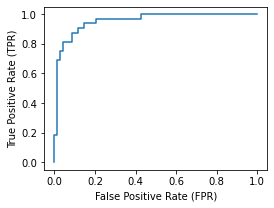

AUC Score: 0.95


In [6]:
#example 5-7

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

df = pd.read_excel(r'data\customer.xlsx')
#with pd.option_context('display.max_rows', 8): display(df)

encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

features = ['gender', 'age', 'salary']
x = df[features]
y = df['purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

#scaling after splitting
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)
probs = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, probs)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

auc_score = auc(fpr, tpr)
print('AUC Score:', 
      '{:.2f}'.format(auc_score))

#auc_score = roc_auc_score(y_test, probs)
#print('AUC Score:', num_format(auc_score))